In [ ]:
# This project is a demonstration of web scraping. We scrape indeed job search site to find the relative frequency
# with which certain educational qualifications and technical skills are mentioned in postings for Data scientist jobs

In [1]:
import urllib.request as request
import urllib.error as error
from bs4 import BeautifulSoup
import math
import re
import matplotlib.pyplot as plt

In [2]:
max_jobs = int(input("Enter number of jobs to aggregate:"))

Enter number of jobs to aggregate:10


In [4]:
url = 'https://www.indeed.com/jobs?q='+request.pathname2url('data scientist')
source = request.urlopen(url).read()
indeed = BeautifulSoup(source)
count_str = indeed.find(id='searchCountPages').contents[0].split()[-2]
count_str = count_str.replace(',','')
count = int(count_str)

In [6]:
count = max_jobs if max_jobs < count else count
links = []
limit = 10
base = "https://www.indeed.com"
for start in range(math.ceil(count/limit)):
    url = 'https://www.indeed.com/jobs?q='+request.pathname2url('data scientist')+'&limit='+str(limit)+'&start='+str(start*50)
    html = request.urlopen(url).read()
    soup = BeautifulSoup(html)
    links += [base+l.get('href') for l in soup.find_all("a", class_="jobtitle turnstileLink")] 
print("Jobs found:", len(links))

Jobs found: 15


In [7]:
qualifications = {'bachelors':0, 'masters':0,' phd ':0}
skills = {'python':0, ' r ':0, 'hadoop':0, 'spark':0, 'tableau':0, ' hive ':0}

In [8]:
for link in links:
    try:
        html_job = request.urlopen(link).read().decode('utf-8')
    except error.URLError:
        print("URL error for ", link)
        continue
    
    job_soup = BeautifulSoup(html_job).find(id="jobDescriptionText")
    job_text = job_soup.get_text()
    job = re.sub("[^a-z ]","",job_text.lower())
    
    for qual in qualifications.keys():
        if qual == 'masters':
            if 'masters' in job or ' ms ' in job:
                qualifications[qual] += 1
        elif qual in job:
            qualifications[qual] += 1
            
    for skill in skills.keys():
        if skill in job:
            skills[skill] += 1
            
print(qualifications)
print(skills)

{'bachelors': 6, 'masters': 4, ' phd ': 2}
{'python': 13, ' r ': 6, 'hadoop': 0, 'spark': 1, 'tableau': 0, ' hive ': 0}


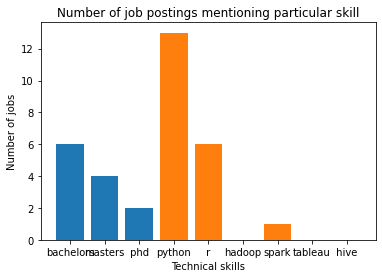

In [9]:

plt.bar(*zip(*qualifications.items()))
plt.xlabel("Educational qualification")
plt.ylabel("Number of jobs")
plt.title("Number of job postings mentioning particular qualification");

plt.bar(*zip(*skills.items()))
plt.xlabel("Technical skills")
plt.ylabel("Number of jobs")
plt.title("Number of job postings mentioning particular skill");

In [ ]:
# Add soft skills
# Take skills as input from users and store most frequent skills
# Show comparison outputs in a nicer way